In [ ]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 205 (delta 54), reused 50 (delta 50), pack-reused 147 (from 1)
Receiving objects: 100% (205/205), 12.58 MiB | 9.02 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
import pandas as pd
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv(home+"wdbc.csv")
df.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,3,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,5,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


#Histograms from my data

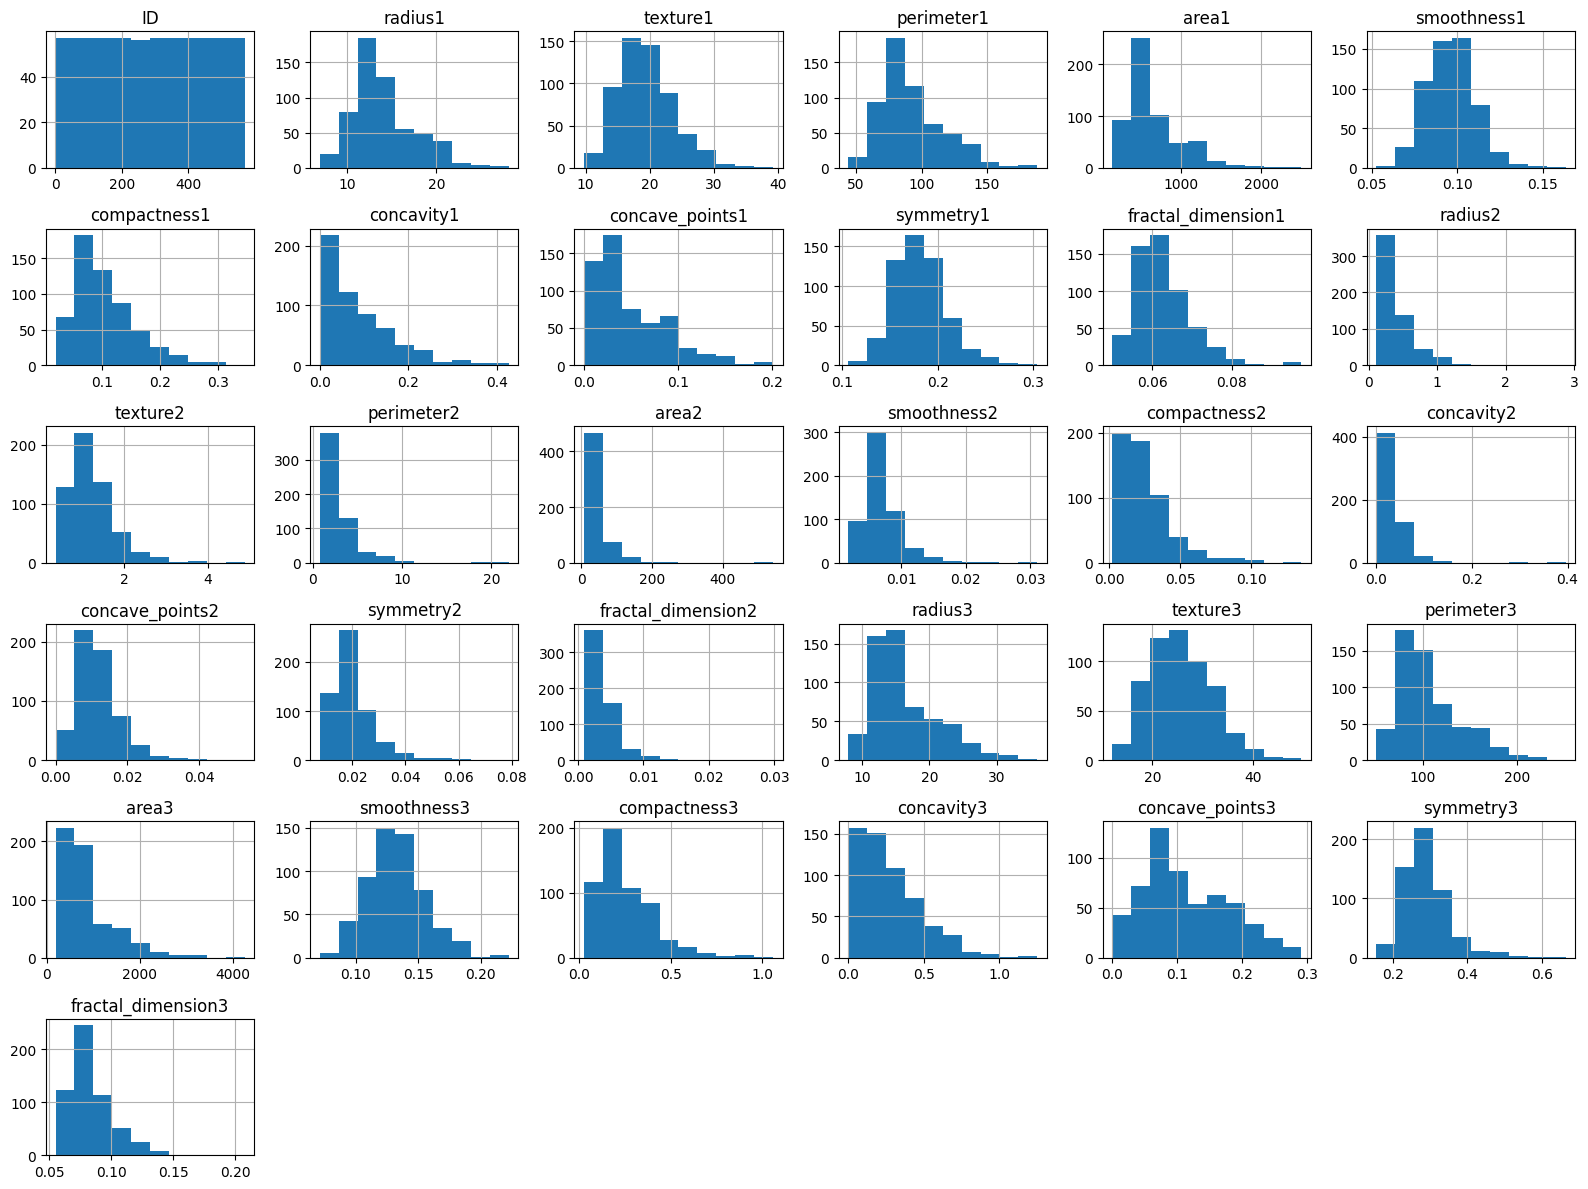

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()


Questions: Are your numerical independent variables uni- or multimodal? Validate your answer with appropriate density plots/histograms.


Amswer: Most of the numerical variables are uni as my histograms show uptop. ID is a constant. Smoothness1,smoothess3, texture3, symmetry3, compactness2 are multimodals.

#Scatter Plots from my data

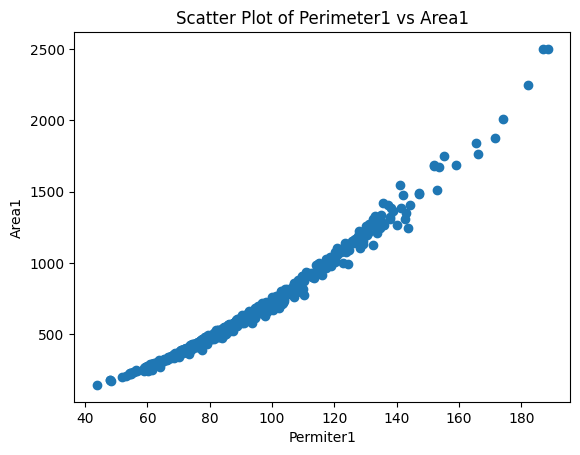

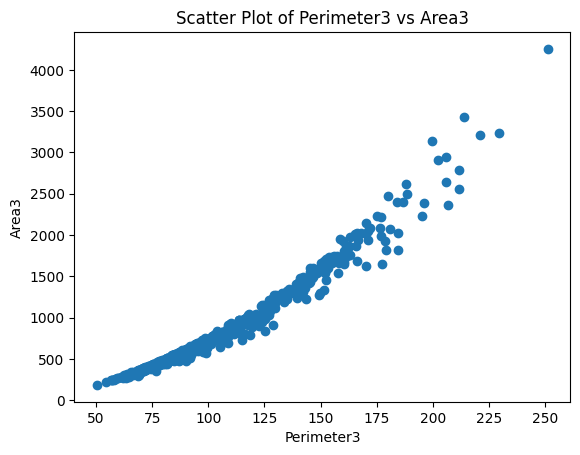

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['perimeter1'], df['area1'])
plt.xlabel('Permiter1')
plt.ylabel('Area1')
plt.title('Scatter Plot of Perimeter1 vs Area1')
plt.show()


plt.scatter(df['perimeter3'], df['area3'])
plt.xlabel('Perimeter3')
plt.ylabel('Area3')
plt.title('Scatter Plot of Perimeter3 vs Area3')
plt.show()



Question: Can you identify clusters when performing scatter plots? Are those clusters intuitive given the nature of the data set or are they surprising?

Answer: Yes there are clusters when I perform my scatter plots. The clusters are intuitive based on the nature of the data set.

In [ ]:
features_df = df.drop(['ID','Diagnosis'],axis=1)


In [ ]:
target_df = pd.DataFrame(df['Diagnosis'])

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

[Ellipsis]

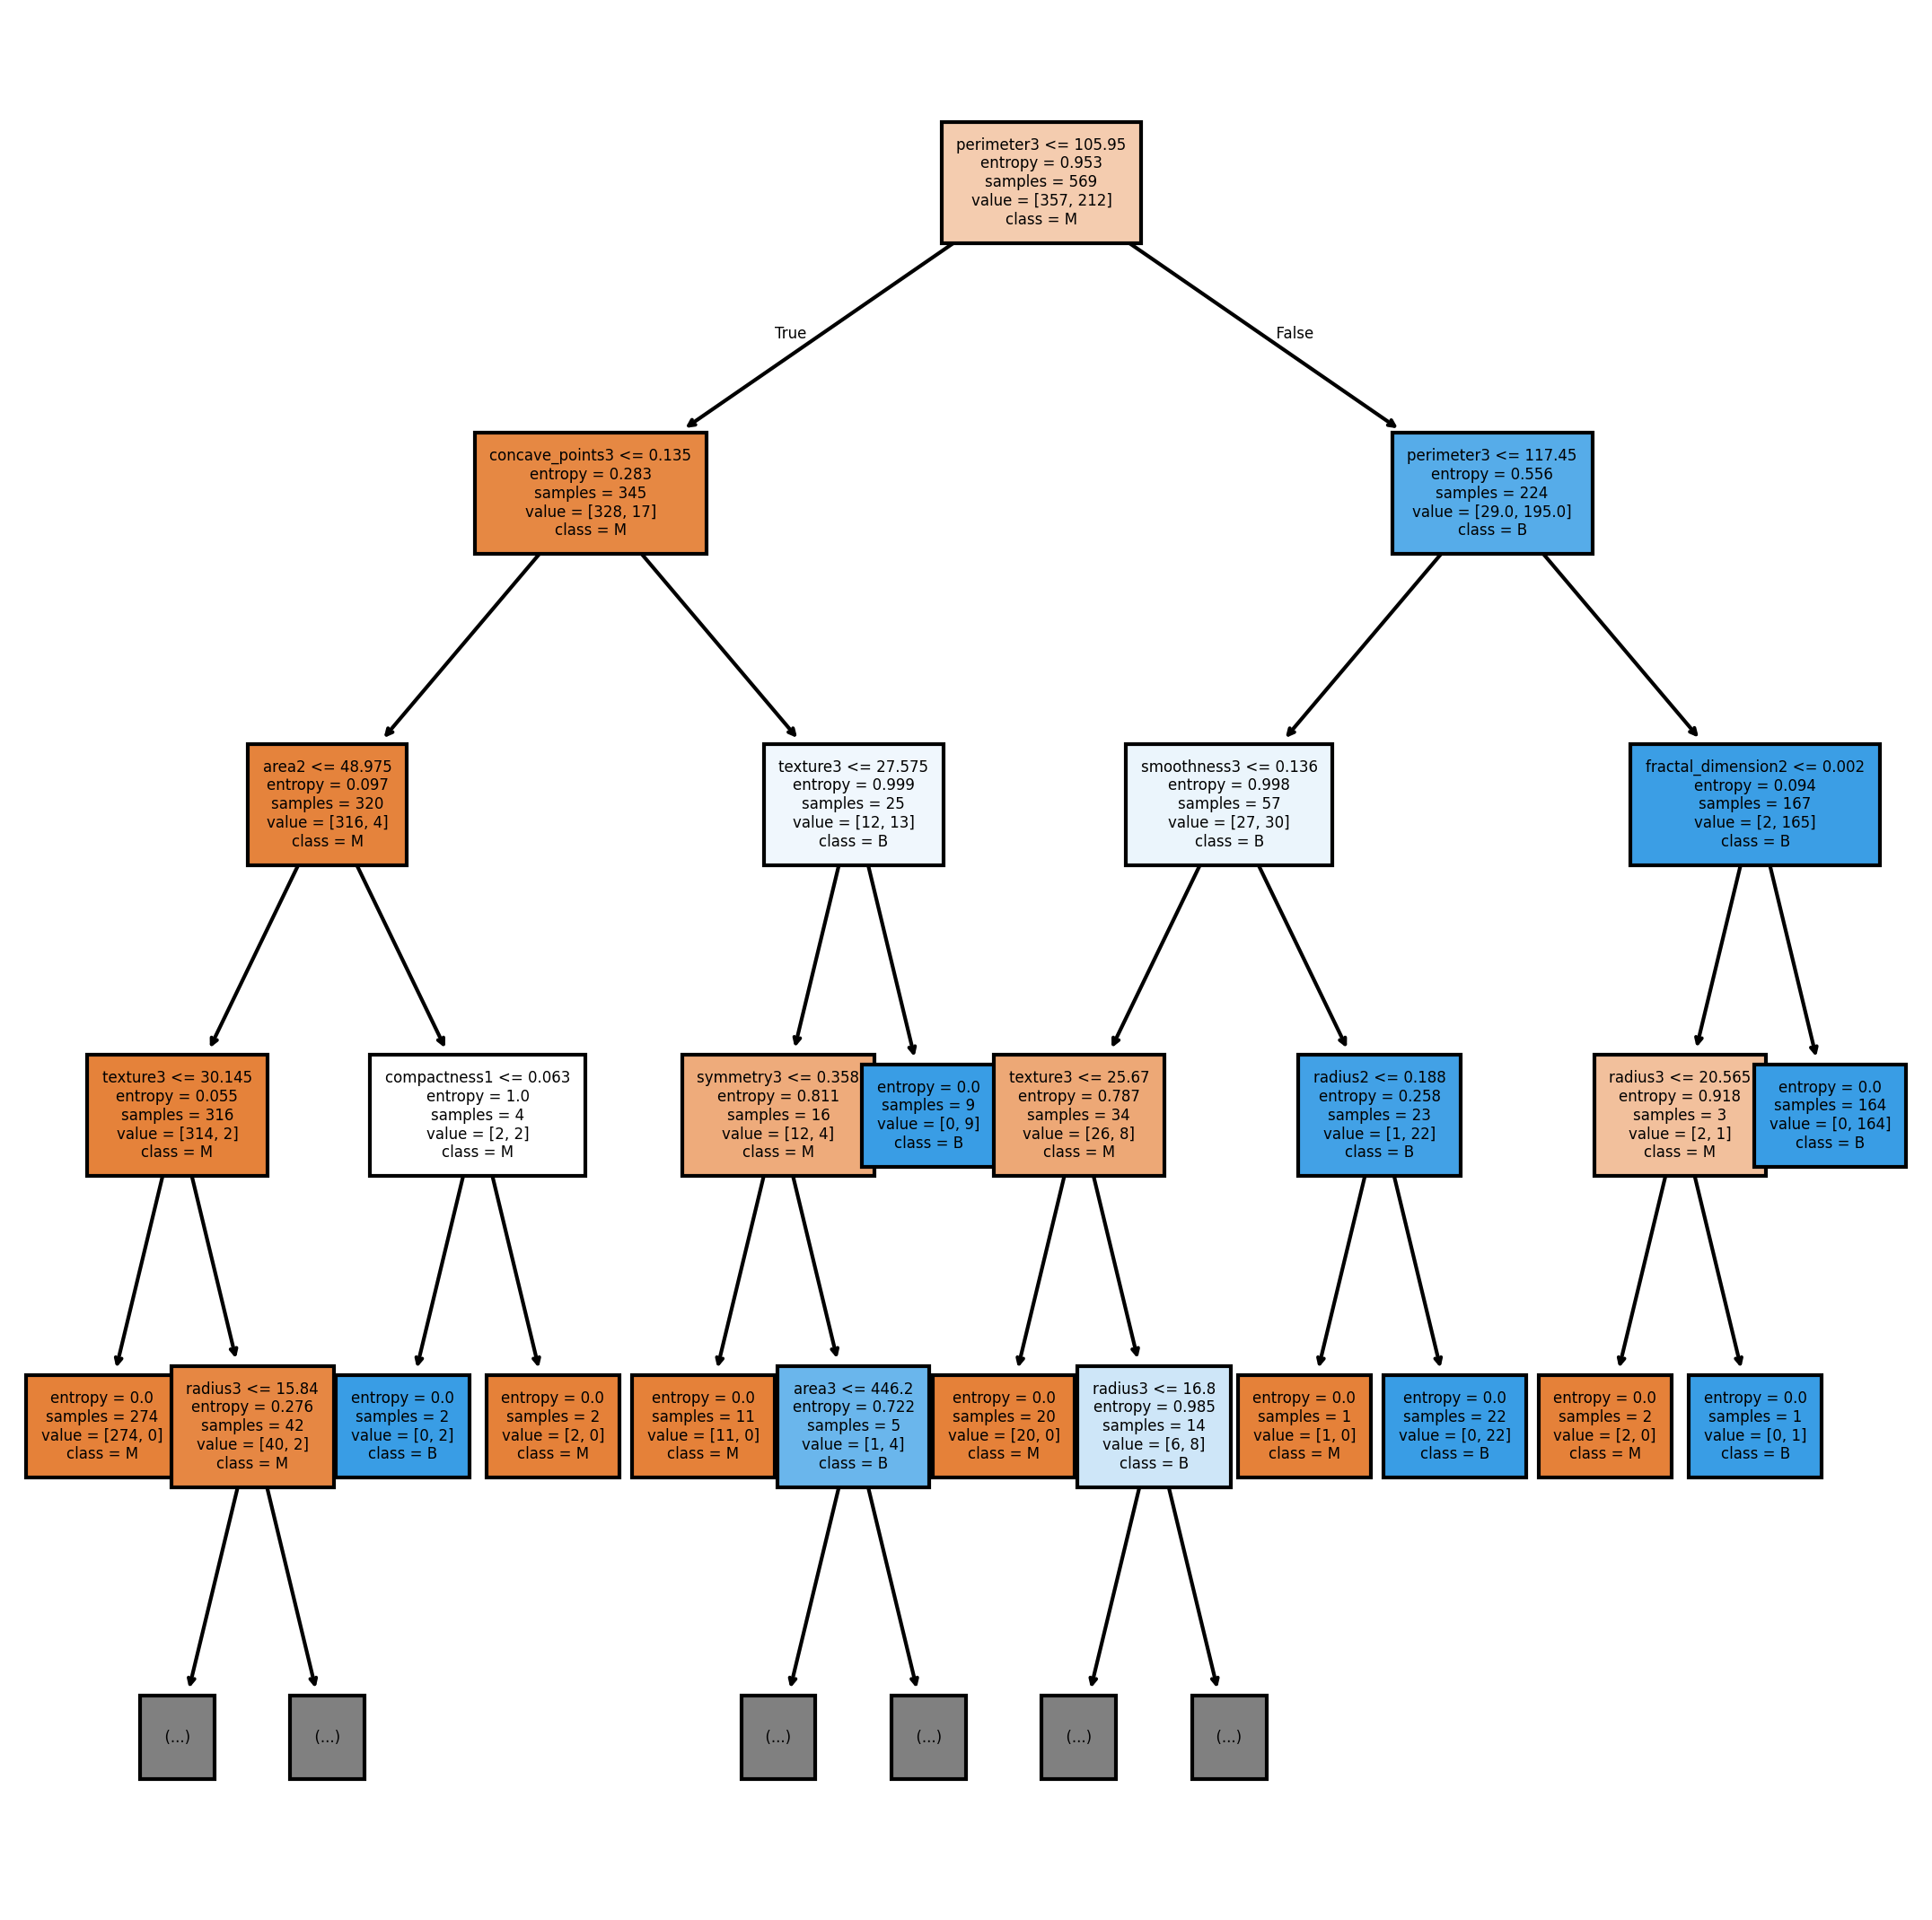

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Diagnosis'].unique()))
[...]

Question: Are those clusters related to your decision tree model from the last lab?

Answer: The clusters identified in the scatter plots are related to the decision tree model because the model aims to separate the data into different classes, and the decision boundaries created by the model are based on the feature space where the clusters exist. The features with high importance in the tree are likely separating those clusters.


In [ ]:
#Counts how many unique values are in the 'play' column
play_counts = df['Diagnosis'].value_counts()
print(play_counts)

#Calculate the percentage of each value
play_percentages = play_counts / len(df) * 100
print(play_percentages)


Diagnosis
B    357
M    212
Name: count, dtype: int64
Diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64


Question: What about the different labels/levels of your dependent variable - are they equally represented, that is, is your data set well balanced? If so why, if not how do you think the imbalance shows up in your tree model?

Answer: The data set is  imbalanced because there are more B than M based on the percentages and for the tree model it might favor 'B' due its greater frequency in the dataset.

[Ellipsis]

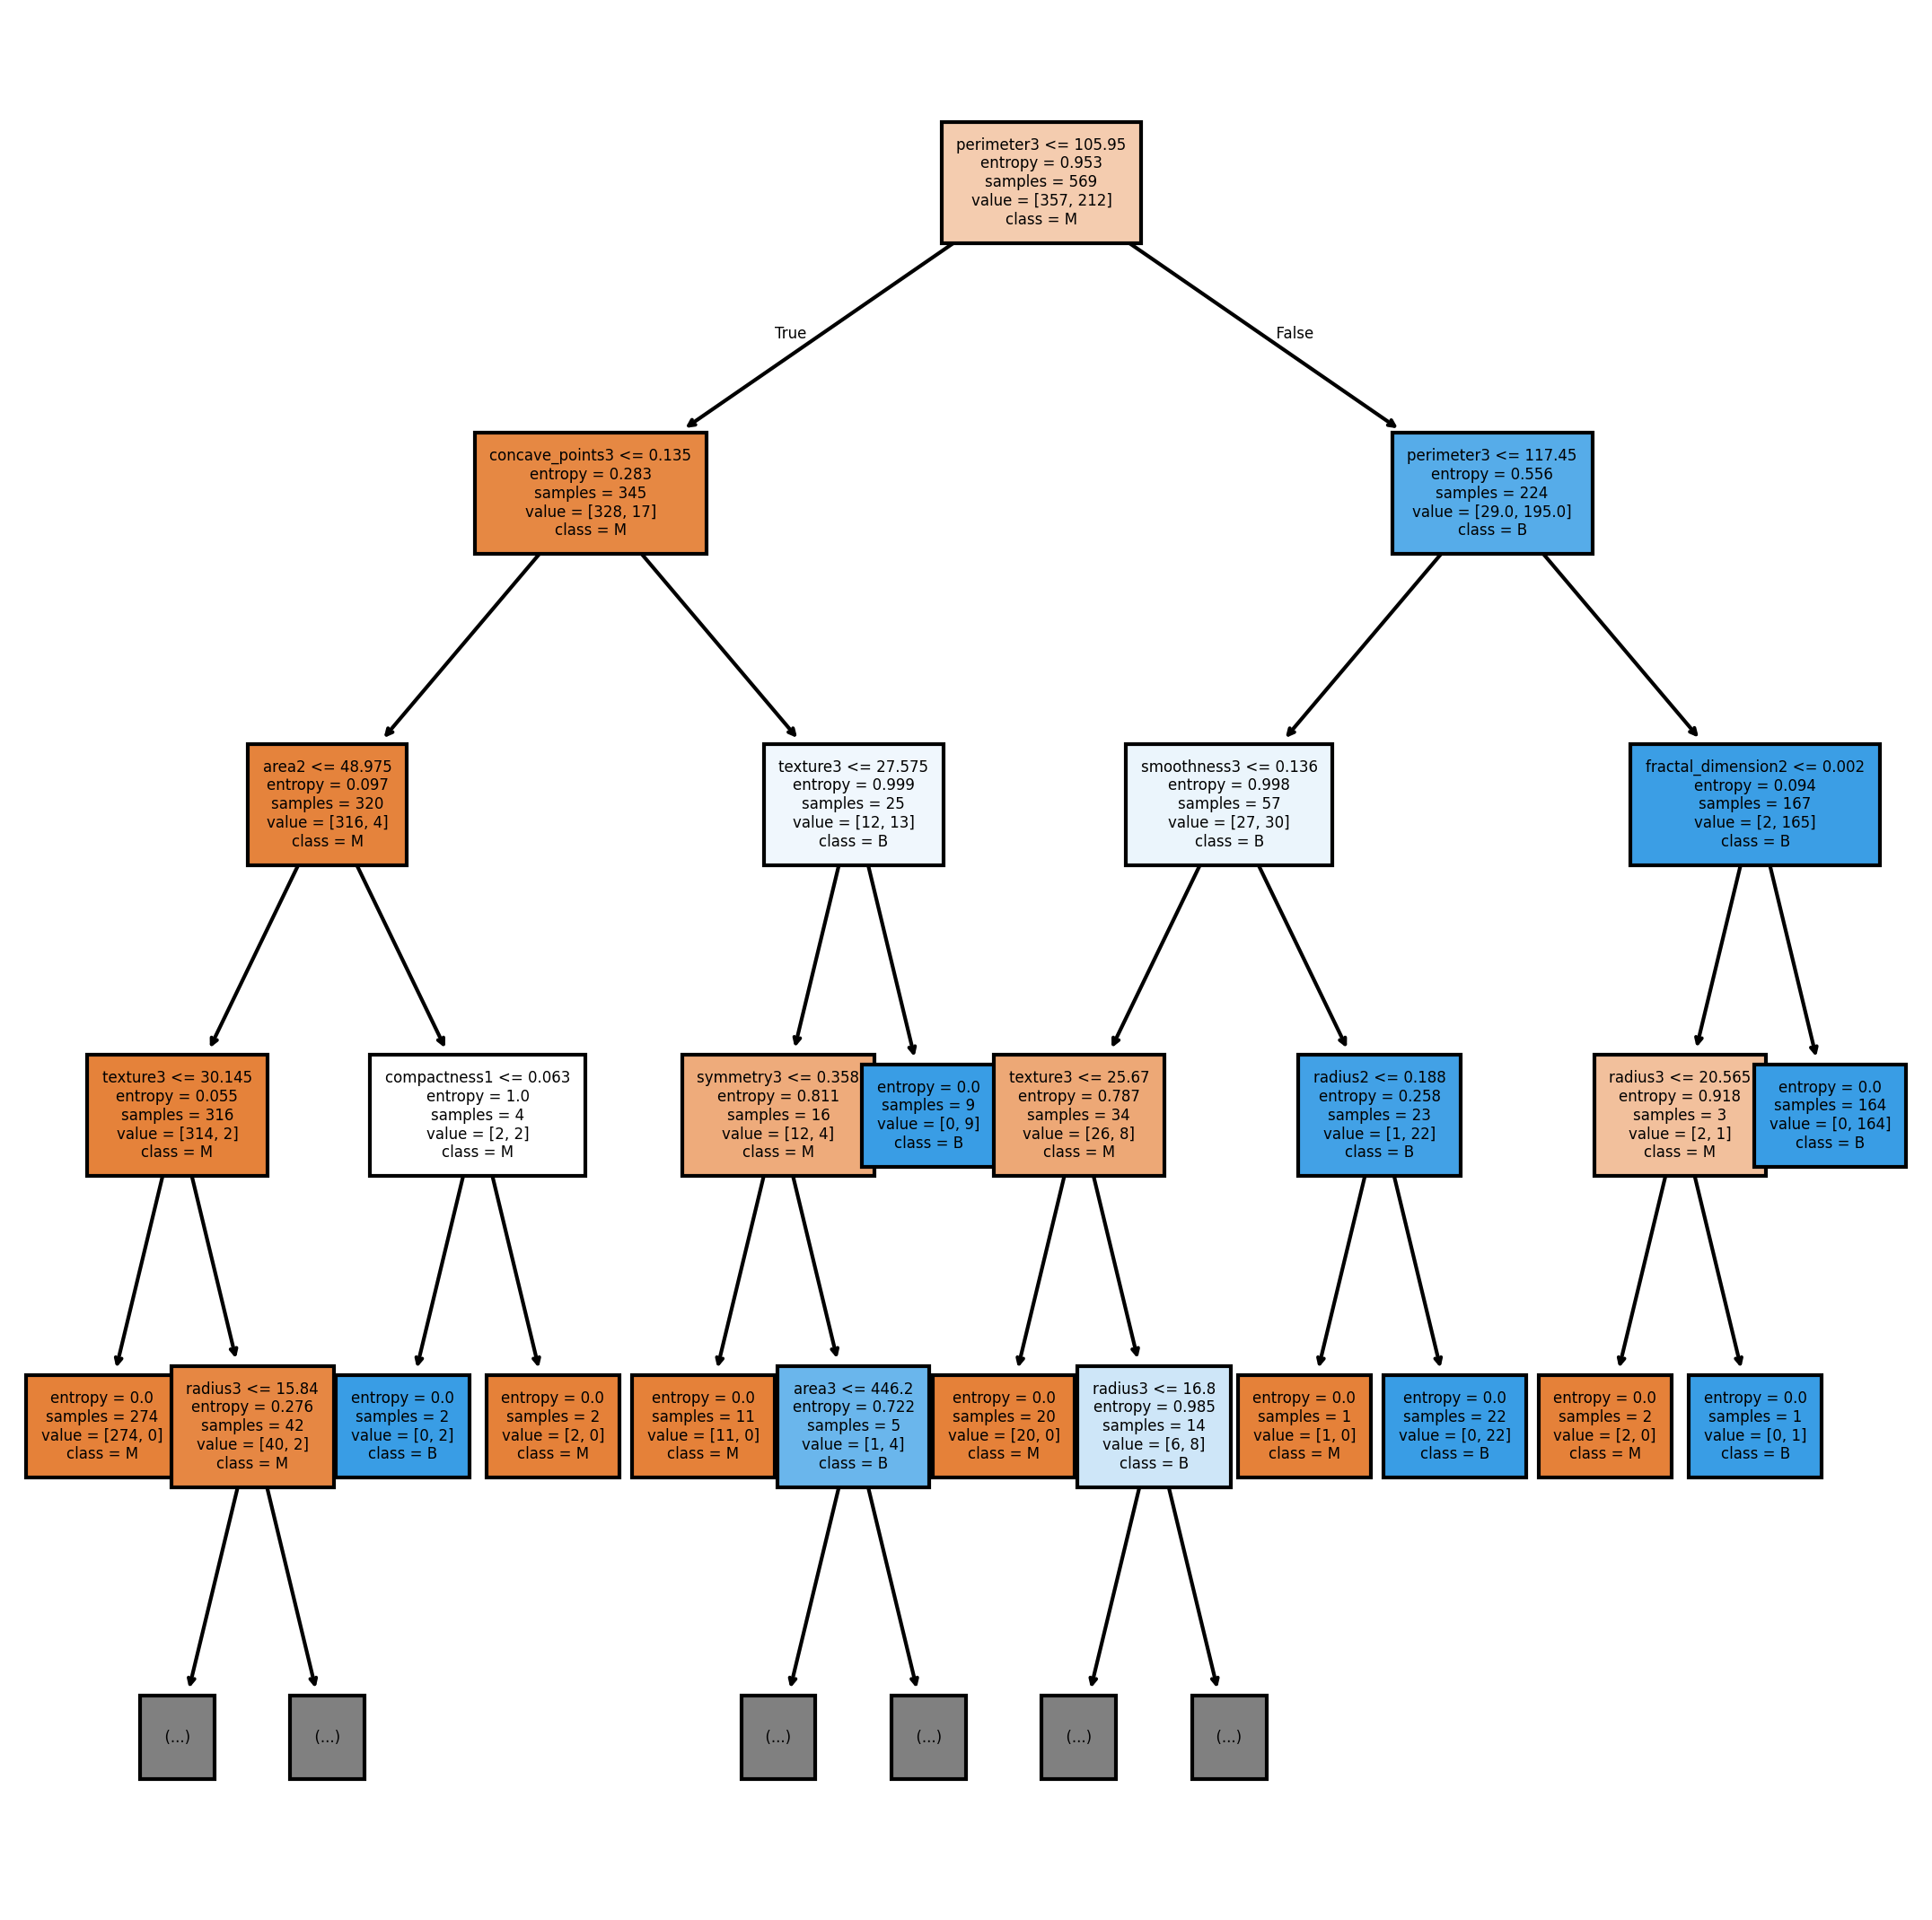

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Diagnosis'].unique()))
[...]

#My unrestricted decision tree model

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if perimeter3 =< 105.95000076293945: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then if texture3 =< 30.145000457763672: 
  |  |  |  |then B
  |  |  |  |else if area3 =< 775.9500122070312: 
  |  |  |  |  |then if concave_points3 =< 0.092289999127388: 
  |  |  |  |  |  |then B
  |  |  |  |  |  |else if compactness1 =< 0.06645000167191029: 
  |  |  |  |  |  |  |then M
  |  |  |  |  |  |  |else B
  |  |  |  |  |else M
  |  |  |else if compactness1 =< 0.06257499940693378: 
  |  |  |  |then M
  |  |  |  |else B
  |  |else if texture3 =< 27.575000762939453: 
  |  |  |then if symmetry3 =< 0.35785000026226044: 
  |  |  |  |then B
  |  |  |  |else if concavity1 =< 0.27719999849796295: 
  |  |  |  |  |then M
  |  |  |  |  |else B
  |  |  |else M
  |else if perimeter3 =< 117.44999694824219: 
  |  |then if smoothness3 =< 0.13610000163316727: 
  |  |  |then if texture3 =< 25.670000076293945: 
  |  |  |  |then B
  |  |  |  |else if area3 =

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=4)
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if perimeter3 =< 105.95000076293945: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then B
  |  |else M
  |else if perimeter3 =< 117.44999694824219: 
  |  |then M
  |  |else M
<---->
Tree Depth:  2


In [ ]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['Diagnosis']          # name the column - same name as in target!
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 0.9209138840070299


Answer: The accuracy of my decision tree is 0.9209138840070299

In [ ]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree2.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
tree_print(dtree2,features_df)

if perimeter3 =< 105.95000076293945: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then B
  |  |else M
  |else if perimeter3 =< 117.44999694824219: 
  |  |then M
  |  |else M
<---->
Tree Depth:  2


[Ellipsis]

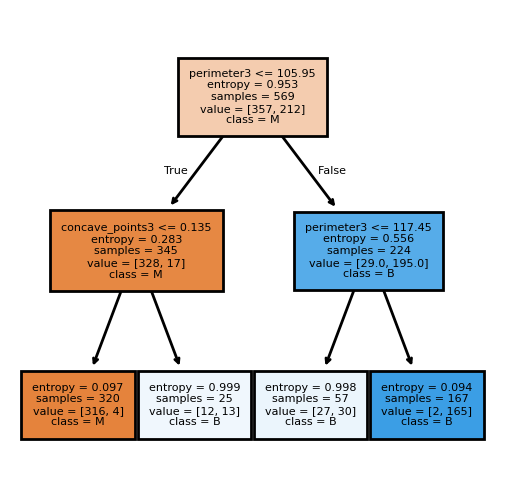

In [ ]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=200)
plot_tree(dtree2, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Diagnosis'].unique()))
[...]

#My simplified model


In [ ]:
import pandas as pd
predict_array2 = dtree2.predict(features_df)
predicted_labels2 = pd.DataFrame(predict_array2)
predicted_labels2.columns = ['Diagnosis']
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels2)))


Our model accuracy is: 0.9209138840070299


Question: Do the unrestricted model and the simplified model agree on the major trends/classifications? Are the classifications induced by the tree model intuitive given the domain of the data?

Answer:
The unrestricted and simplified models generally agree on the major trends and classifications, but the simplified model has a reduced accuracy due to its restricted depth.

The classifications are intuitively related to the domain, as the tree model effectively utilizes features like perimeter and area, which are clinically relevant to cancer detection.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

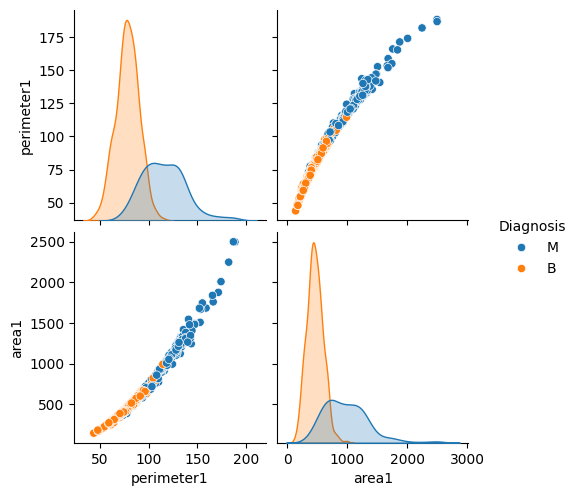

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

important_features = ['perimeter1', 'area1']

sns.pairplot(df[important_features + ['Diagnosis']], hue='Diagnosis')
plt.show()


Question: Use the variables that appear in the simplified tree model and created a scatter plot matrix of those variables.  Can you relate the decision surfaces of the tree model to the scatter plots? Hint: Use the Seaborn library and use color for the different classes. This way clusters and decision boundaries are much easier to spot.

Answer: The decision surfaces of the tree model are directly related to the scatter plots because the model uses the feature space to create decision boundaries. The decision boundaries separate the data points into different classes based on feature values.

The scatter plots visualize the distribution of data points in the feature space, helping me identify clusters. The decision boundaries of the tree model attempt to split these clusters based on the features utilized in the model.

The decision tree model will create decision boundaries in this feature space, aiming to separate these clusters.

Essentially, the decision boundaries of the tree model aim to maximize the separation between different classes visible in the scatter plots.